In [30]:
#!pip install --quiet --user git+https://github.com/hmmlearn/hmmlearn
from hmmlearn import hmm
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense,BatchNormalization, LeakyReLU, Dense, Reshape, Flatten, Activation
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras import initializers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, multiply, GaussianNoise, MaxPooling2D, concatenate,LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from scipy.stats import kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
df_train=pd.read_hdf('dftrain.h5')
df_test=pd.read_hdf('dfvalid.h5')
df_test_y=pd.read_csv('dfvalid_groundtruth.csv')
df_test_y=pd.merge(df_test_y,df_test,left_index=True,right_index=True)
df_train_ds=pd.read_csv('dt_train_ds.csv')
from sklearn.model_selection import train_test_split
df_train_ds=df_train_ds.drop('Unnamed: 0',axis=1)
feature_cols=df_train_ds.columns[1:]
X_train, X_test = train_test_split(df_train_ds[feature_cols], test_size=0.2, random_state=42)

In [32]:
df_train_ds

,id,v_avg_0,v_kurt_0,v_shift_0,v_avg_1,v_kurt_1,v_shift_1,v_avg_2,v_kurt_2,v_shift_2,...,v_shift_56,v_avg_57,v_kurt_57,v_shift_57,v_avg_58,v_kurt_58,v_shift_58,v_avg_59,v_kurt_59,v_shift_59
0,0,0.0390829,0.2263653,-0.0001188,0.0392016,-0.0599682,0.0001219,0.0390797,-0.2707382,0.0001909,...,-0.0003011,0.0393236,-0.3395755,0.0002046,0.0391189,0.0845221,-0.0000159,0.0391348,-0.2109074,-0.0000159
1,1,0.0070044,-1.3217286,0.0026455,0.0043589,-1.1862217,-0.0032923,0.0076512,-1.1379677,0.0067234,...,-0.0011536,0.0016424,-1.4108825,-0.0012140,0.0028565,-1.4461540,-0.0004326,0.0032891,-1.4438811,-0.0004326
2,2,0.0013491,-0.6127737,-0.0075912,0.0089403,-0.9589561,-0.0030554,0.0119957,0.2258686,-0.0092471,...,0.0027286,0.0137073,-1.4400026,0.0007376,0.0129697,-1.4239504,0.0002795,0.0126902,-1.4620963,0.0002795
3,3,0.0066109,-0.9936848,0.0030051,0.0036057,-0.9824369,-0.0021497,0.0057554,-1.4425644,-0.0003394,...,-0.0016918,0.0066299,-0.2813535,0.0021497,0.0044802,-0.3357841,0.0015893,0.0028909,-0.4239741,0.0015893
4,4,0.0280907,-1.3628810,-0.0028024,0.0308931,-1.4714867,0.0095343,0.0213588,-1.5058433,-0.0078558,...,-0.0509626,0.0810509,-0.8542203,0.0069461,0.0741048,-1.1731438,0.0482821,0.0258227,-1.4838246,0.0482821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,1672,-0.0033684,-1.0256128,-0.0023121,-0.0010563,-1.1243702,0.0026750,-0.0037313,-1.2545131,0.0048586,...,-0.0061168,-0.0061985,0.2151451,-0.0040210,-0.0021775,-0.3640717,0.0057935,-0.0079710,-0.2910347,0.0057935
1673,1673,-0.1010157,-1.1011693,-0.0047875,-0.0962283,-1.2064313,-0.0153900,-0.0808383,-1.1511606,-0.0245343,...,-0.0155681,-0.0122376,5.6969573,-0.0051886,-0.0070491,5.9469930,-0.0066987,-0.0003504,0.6313470,-0.0066987
1674,1674,-0.0059063,-1.3029654,0.0102423,-0.0161486,-1.3284689,0.0132687,-0.0294173,-1.2842791,0.0045277,...,0.0013108,-0.0246027,1.6314764,-0.0059670,-0.0186357,3.7024079,0.0040360,-0.0226717,-0.2323829,0.0040360
1675,1675,-0.0271257,0.3510678,-0.0020876,-0.0250381,-0.0571278,0.0010062,-0.0260443,0.2637095,-0.0026140,...,0.0011005,-0.0250607,0.2106426,-0.0029088,-0.0221519,0.4714454,0.0013046,-0.0234565,-0.0215278,0.0013046


In [33]:
df_train=pd.read_hdf('dftrain.h5')

In [59]:
df_test=pd.read_hdf('dfvalid.h5')

In [60]:
df_test_prep=df_test_ds[feature_cols]

NameError: name 'df_test_ds' is not defined

In [35]:
df_test_y=pd.read_csv('dfvalid_groundtruth.csv')

In [36]:
df_test_y=pd.merge(df_test_y,df_test,left_index=True,right_index=True)
df_test_y
fcols=df_test_y.columns[2:61141]

In [37]:
s1=df_test_y[df_test_y['seqID']==1][fcols].T

In [38]:
df_test_y[fcols]

,0,1,2,3,4,5,6,7,8,9,...,61129,61130,61131,61132,61133,61134,61135,61136,61137,61138
0,0.0706501,0.0855238,0.0768474,0.0855238,0.1202291,0.1400607,0.1078343,0.0483395,0.0148737,0.0309869,...,-0.0111553,0.0198316,0.0272684,0.0161132,-0.0024789,-0.0272684,-0.0532974,-0.0632132,-0.0446211,-0.0061974
1,-0.3006850,-0.8826561,-1.7337888,-2.1811790,-1.9423284,-1.7192395,-1.9811265,-2.3230345,-2.3254594,-2.3497082,...,-0.4231415,-1.2779115,-1.3167095,-1.6355812,-2.3400086,-3.2529757,-3.5221374,-2.5934085,-2.4224545,-3.7246148
2,-0.0563976,-0.1520284,-0.0588497,0.1409941,0.1704189,0.1544805,0.2709538,0.3592284,0.3347076,0.3494201,...,0.0294248,0.0674319,0.0821444,0.1581586,0.2108781,0.1728710,0.1458982,0.1606106,0.1409941,0.1127953
3,0.0306180,0.0204120,0.0587467,0.1247123,0.1558282,0.1615535,0.1677767,0.1705149,0.1650385,0.1411415,...,-0.0263862,-0.0694506,-0.0848840,-0.0599914,-0.0482918,-0.0696995,-0.0784119,-0.0599914,-0.0368412,-0.0413218
4,-1.0715973,-6.9125397,-13.6776119,-16.4635190,-15.7900840,-11.6536203,-7.6683107,-9.9429971,-14.3215534,-13.7046476,...,-14.1507368,-14.5808504,-14.4702498,-13.0299837,-7.1767523,-1.3161476,-2.6224639,-7.1914991,-5.8225090,-1.1453310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-18.2914147,-18.2889569,-18.2852701,-18.2828122,-18.2803544,-18.2766676,-18.2717518,-18.2680651,-18.2680651,-18.2705229,...,-19.5043700,-19.5019122,-19.4994543,-19.4969964,-19.4920807,-19.4908518,-19.4908518,-19.4933096,-19.4957675,-19.4994543
590,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,...,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385
591,0.0317998,-0.1437353,-0.0597837,0.2480388,0.2836546,-0.0101759,-0.1539112,0.0699596,0.2836546,0.1831671,...,-0.0877676,0.1551832,0.2022470,-0.0686877,-0.0928555,0.3040065,0.4566457,0.0610557,-0.2264149,0.0190799
592,-0.0266352,-0.0266352,-0.0067210,0.0092103,-0.0084635,-0.0360944,-0.0390815,-0.0261373,-0.0176738,-0.0176738,...,0.1028068,0.0898626,0.0741802,0.0597424,0.0480429,0.0470472,0.0433133,0.0336051,0.0241459,0.0251416


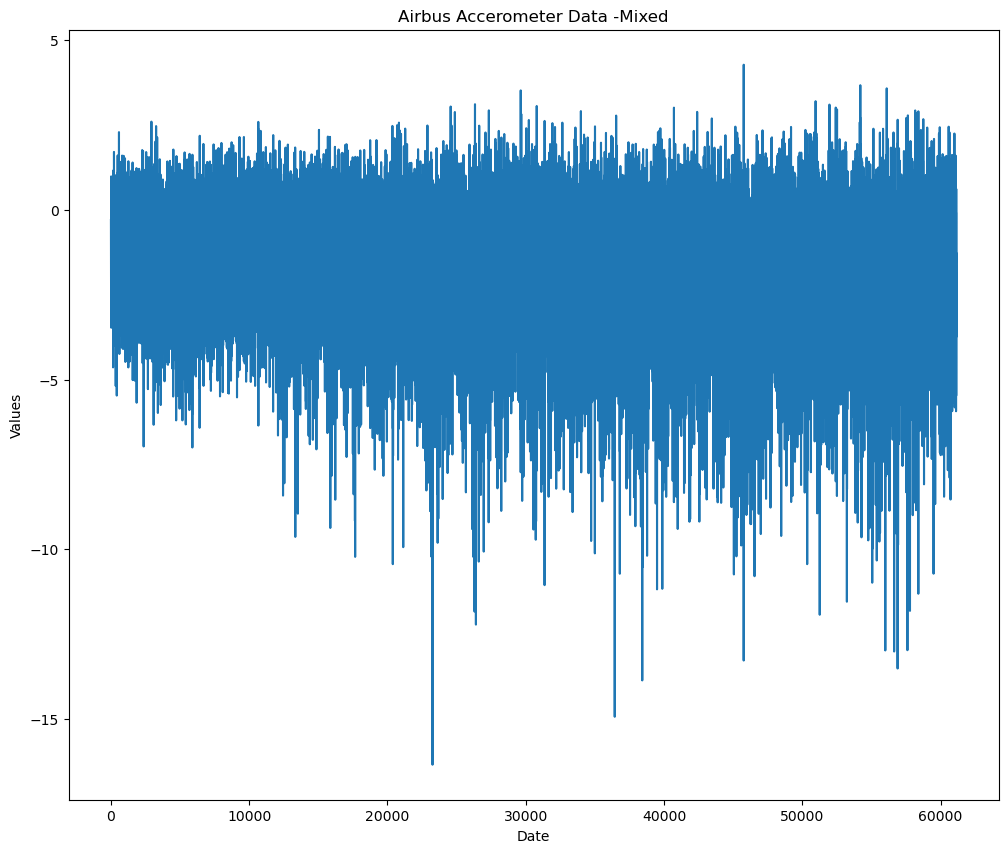

In [39]:
import matplotlib.pyplot as plt
 # Using a inbuilt style to change
# the look and feel of the plot
#plt.style.use("fivethirtyeight")

# setting figure size to 12, 10
plt.figure(figsize=(12, 10))

# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Airbus Accerometer Data -Mixed")
plt.plot(np.array(s1))
#plt.plot(dataframe.rolling( window=2, min_periods=1).mean()["A"])

In [40]:
input = df_train[1:2]
data = input.copy()
data = data.T
data.index = pd.date_range(start='1/1/2018', periods=input.shape[1], freq='L')
df_t1=data.resample('1024L').mean()
df_t1 = df_t1.set_axis(['v_avg'], axis=1, inplace=False)
data_resample_mean = data.resample('1024L').mean()
level_shift = (data_resample_mean - data_resample_mean.shift(-1)).interpolate()
df_t2=level_shift.resample('1024L').max()
df_t2 = df_t2.set_axis(['v_shift'], axis=1, inplace=False)
df_t3=data.resample('1024L').apply(lambda x : kurtosis(x))
df_t3 = df_t3.set_axis(['v_kurt'], axis=1, inplace=False)

C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\13499002.py:6: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t1 = df_t1.set_axis(['v_avg'], axis=1, inplace=False)
C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\13499002.py:10: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t2 = df_t2.set_axis(['v_shift'], axis=1, inplace=False)
C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\13499002.py:12: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t3 = df_t3.set_axis(['v_kurt'], axis=1, inplace=False)


In [41]:
df_train_c = df_t1.join(df_t2).join(df_t3)
df_train_c['s']=range(0,len(df_train_c))

In [42]:
def down_sample_preprocess(df):
    dfret = pd.DataFrame()
    for i in range(0, len(df)):
        #print("Row: ", i)
        input = df[i:i + 1]
        #print("Shape of input ",input.shape)
        data = input.copy()
        data = data.T
        data.index = pd.date_range(start='1/1/2018', periods=input.shape[1], freq='L')
        #print(data.head)
        df_t1 = data.resample('1024L').mean()
        df_t1 = df_t1.set_axis(['v_avg'], axis=1, inplace=False)
        data_resample_mean = data.resample('1024L').mean()
        level_shift = (data_resample_mean - data_resample_mean.shift(-1)).interpolate()
        df_t2 = level_shift.resample('1024L').max()
        df_t2 = df_t2.set_axis(['v_shift'], axis=1, inplace=False)
        df_t3 = data.resample('1024L').apply(lambda x: kurtosis(x))
        df_t3 = df_t3.set_axis(['v_kurt'], axis=1, inplace=False)
        df_train_c = df_t1.join(df_t2).join(df_t3)
        df_train_c['s'] = range(0, len(df_train_c))
        df_train_c['id'] = i
        df2 = df_train_c.pivot_table(index=['id'], columns=['s'], values=['v_avg', 'v_shift', 'v_kurt'])
        df2 = df2.sort_index(axis=1, level=1)
        df2.columns = [f'{x}_{y}' for x, y in df2.columns]
        df2 = df2.reset_index()
        if (len(dfret) == 0):
            dfret = df2
        else:
            dfret = dfret.append(df2)
    return dfret


In [43]:
df_train_ds=down_sample_preprocess(df_train)

C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\1863175116.py:12: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t1 = df_t1.set_axis(['v_avg'], axis=1, inplace=False)
C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\1863175116.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t2 = df_t2.set_axis(['v_shift'], axis=1, inplace=False)
C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\1863175116.py:18: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t3 = df_t3.set_axis(['v_kurt'], axis=1, inplace=False)
C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\1863175116.py:12: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be rem

In [44]:
feature_cols=df_train_ds.columns[1:]

In [45]:
feature_cols

Index(['v_avg_0', 'v_kurt_0', 'v_shift_0', 'v_avg_1', 'v_kurt_1', 'v_shift_1',
       'v_avg_2', 'v_kurt_2', 'v_shift_2', 'v_avg_3',
       ...
       'v_shift_56', 'v_avg_57', 'v_kurt_57', 'v_shift_57', 'v_avg_58',
       'v_kurt_58', 'v_shift_58', 'v_avg_59', 'v_kurt_59', 'v_shift_59'],
      dtype='object', length=180)

In [46]:
X_train.shape

(1341, 180)

In [61]:
df_test_ds=down_sample_preprocess (df_test_y[fcols])

C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\1863175116.py:12: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t1 = df_t1.set_axis(['v_avg'], axis=1, inplace=False)
C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\1863175116.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t2 = df_t2.set_axis(['v_shift'], axis=1, inplace=False)
C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\1863175116.py:18: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t3 = df_t3.set_axis(['v_kurt'], axis=1, inplace=False)
C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\1863175116.py:12: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be rem

In [62]:
df_test_prep=df_test_ds[feature_cols]

# Batch normalizing 

In [47]:
# Defining the Generator network
from tensorflow.keras.layers import Dropout, BatchNormalization
def get_generator(optimizer):
    
    generator = Sequential()
    generator.add(Dense(64, input_dim=180, kernel_initializer=initializers.glorot_normal(seed=42)))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(128))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(256))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(256))
    generator.add(Activation('tanh'))
       
    generator.add(Dense(512))
    generator.add(Activation('tanh'))
   
    generator.add(Dense(180, activation='tanh'))
    # Add dropout and batch normalization
    generator.add(Dropout(0.3))
    generator.add(BatchNormalization())
    
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return generator

In [48]:
##### Defining the Discriminator network

def get_discriminator(optimizer):
    
    discriminator = Sequential()
    
    discriminator.add(Dense(256, input_dim=180, kernel_initializer=initializers.glorot_normal(seed=42)))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
       
    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(1))
    discriminator.add(Activation('sigmoid'))
    # Add dropout and batch normalization
    discriminator.add(Dropout(0.3))
    discriminator.add(BatchNormalization())
    
   
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)

    return discriminator

In [49]:
# Defining the Encoder network
def get_encoder(optimizer):
    encoder_input = Input(shape=(64,))
    x = Dense(128, activation='relu')(encoder_input)
    x = Dense(256, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    encoder_output = Dense(64, activation='tanh')(x)
    
    # Add batch normalization
    encoder_output = BatchNormalization()(encoder_output)
    
    encoder = Model(inputs=encoder_input, outputs=encoder_output)
    encoder.compile(loss='binary_crossentropy', optimizer=optimizer)
    return encoder

In [50]:
def get_gan_network(discriminator, generator, optimizer,input_dim=180):

    discriminator.trainable = False   
    gan_input = Input(shape=(input_dim,))  
    x = generator(gan_input) 
    gan_output = discriminator(x)
    
    gan = Model(inputs=gan_input, outputs=gan_output)    
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return gan

In [51]:
learning_rate = 0.0001
batch_size = 32
epochs = 300
adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)

In [52]:
#Inititalizing the network
generator = get_generator(adam)
discriminator = get_discriminator(adam)
gan = get_gan_network(discriminator, generator, adam,input_dim=180)

In [ ]:
#Calculating the number of batches based on the batch size
from tqdm import tqdm
batch_count = X_train.shape[0] // batch_size
pbar = tqdm(total=epochs * batch_count)
gan_loss = []
discriminator_loss = []

#Inititalizing the network
generator = get_generator(adam)
discriminator = get_discriminator(adam)
gan = get_gan_network(discriminator, generator, adam,input_dim=180)


for epoch in range(epochs):
    for index in range(batch_count):
        pbar.update(1)
        # Creating a random set of input noise and images
        noise = np.random.normal(0, 1, size=[batch_size,180])

        # Generate fake samples
        generated_images = generator.predict_on_batch(noise)

        #Obtain a batch of normal network packets
        image_batch = X_train[index * batch_size: (index + 1) * batch_size]

        X = np.vstack((generated_images,image_batch))
        y_dis = np.ones(2*batch_size)
        y_dis[:batch_size] = 0

        # Train discriminator
        discriminator.trainable = True
        d_loss= discriminator.train_on_batch(X, y_dis)

        # Train generator
        noise = np.random.uniform(0, 1, size=[batch_size, 180])
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gen)

        #Record the losses
        discriminator_loss.append(d_loss)
        gan_loss.append(g_loss)

    print("Epoch %d Batch %d/%d [D loss: %f] [G loss:%f]" % (epoch,index,batch_count, d_loss, g_loss))


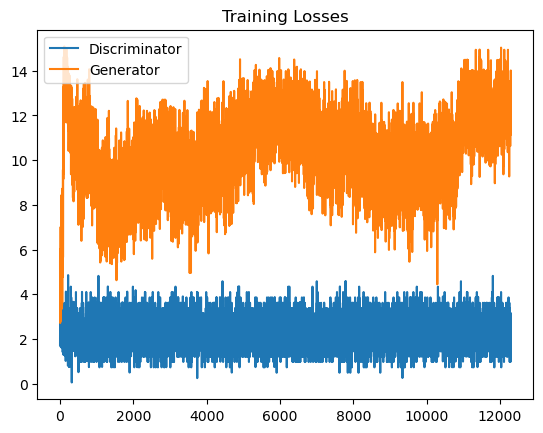

In [54]:
fig, ax = plt.subplots()
plt.plot(discriminator_loss, label='Discriminator')
plt.plot(gan_loss, label='Generator')
plt.title("Training Losses")
plt.legend()

In [63]:
# Predictions on the test set

nr_batches_test = np.ceil(df_test_prep.shape[0] // batch_size).astype(np.int32)

results =[]

for t in range(nr_batches_test +1):    
        ran_from = t * batch_size
        ran_to = (t + 1) * batch_size
        image_batch = df_test_prep[ran_from:ran_to]             
        tmp_rslt = discriminator.predict(x=image_batch,batch_size=32,verbose=0)        
        results = np.append(results, tmp_rslt) 

C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [64]:
df_test_prep=df_test_ds[feature_cols]

In [65]:
# Predictions on the test set

nr_batches_test = np.ceil(df_test_prep.shape[0] // batch_size).astype(np.int32)

results =[]

for t in range(nr_batches_test +1):
        ran_from = t * batch_size
        ran_to = (t + 1) * batch_size
        image_batch = df_test_prep[ran_from:ran_to]
        tmp_rslt = discriminator.predict(x=image_batch,batch_size=32,verbose=0)
        results = np.append(results, tmp_rslt)

In [66]:
pd.options.display.float_format = '{:20,.7f}'.format
results_df = pd.concat([pd.DataFrame(results),pd.DataFrame(df_test_y['anomaly'].values)], axis=1)
results_df.columns = ['results','y_test']
print ('Mean score for normal signals :', results_df.loc[results_df['y_test'] == 0, 'results'].mean() )
print ('Mean score for anomalous signals :', results_df.loc[results_df['y_test'] == 1, 'results'].mean())

Mean score for normal signals : 0.7286449126924328
Mean score for anomalous signals : 1.3931681896959032


In [70]:
#Obtaining the lowest 1% score
per = np.percentile(results,12.5)
y_pred = results.copy()
y_pred = np.array(y_pred)

#Thresholding based on the score
inds = (y_pred > per)
inds_comp = (y_pred <= per)
y_pred[inds] = 0
y_pred[inds_comp] = 1

In [71]:
from sklearn.metrics import classification_report


# Predictions on the test set
nr_batches_test = np.ceil(df_test_prep.shape[0] // batch_size).astype(np.int32)

results =[]

for t in range(nr_batches_test +1):
        ran_from = t * batch_size
        ran_to = (t + 1) * batch_size
        image_batch = df_test_prep[ran_from:ran_to]
        tmp_rslt = discriminator.predict(x=image_batch,batch_size=32,verbose=0)
        results = np.append(results, tmp_rslt)

# Convert results to binary class labels
binary_results = (results > 0.5).astype(int)

# Obtain ground truth labels
true_labels = np.zeros_like(binary_results)
true_labels[:results.shape[0]] = 1

# Calculate classification report
report = classification_report(true_labels, binary_results)
print(report)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97       594

    accuracy                           0.94       594
   macro avg       0.50      0.47      0.48       594
weighted avg       1.00      0.94      0.97       594


C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix :


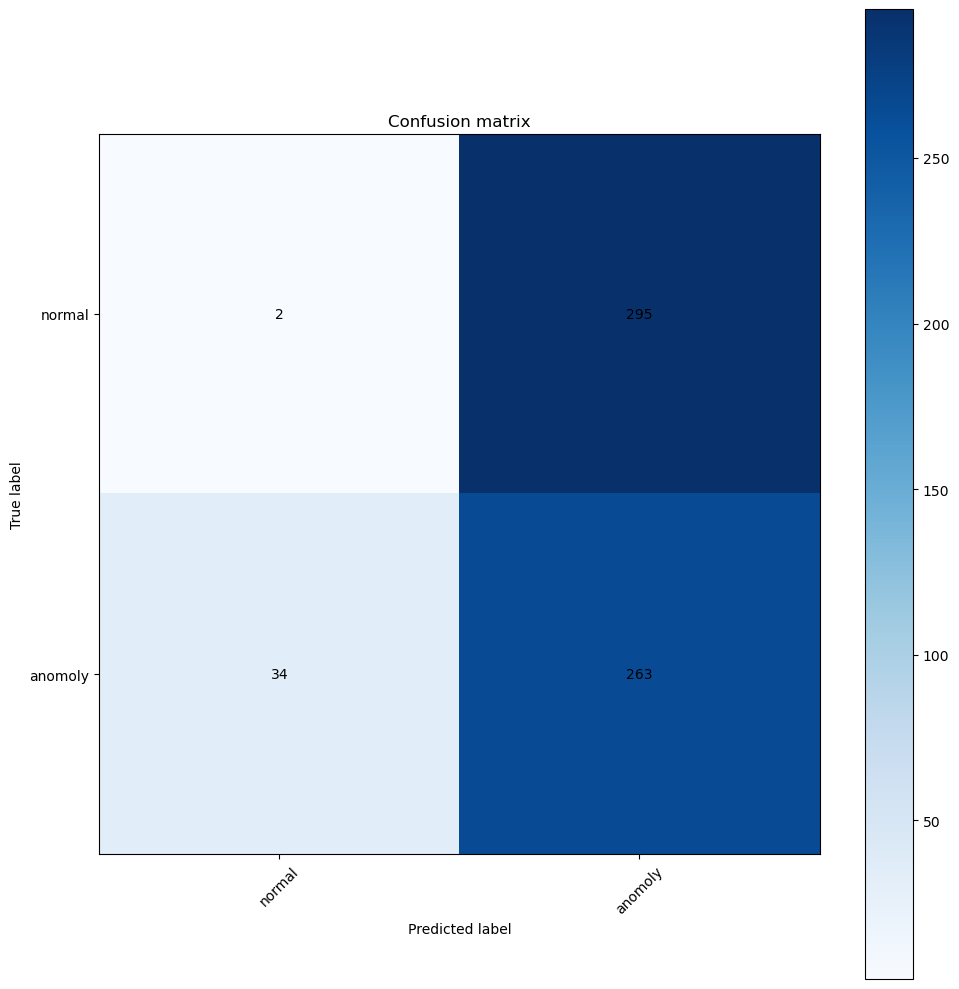

In [77]:
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

cm = confusion_matrix(df_test_y['anomaly'].values, y_pred_binary)  # Use y_pred_binary instead of y_pred

target_names = ['normal', 'anomoly']

print ('Confusion Matrix :')

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                         horizontalalignment='center',
                         verticalalignment='center')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm, target_names)


In [78]:
# Calculate metrics
TP = 263
TN = 2
FP = 34
FN = 295

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall (Sensitivity or True Positive Rate)
recall = TP / (TP + FN)

# F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Accuracy: 0.44612794612794615
Precision: 0.8855218855218855
Recall: 0.471326164874552
F1-score: 0.6152046783625731
